# Breast Cancer Survival Prediction with Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a patient will survive breast cancer or not.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling

## 1. Problem Definition

In a statement,
> Given clinical parameters about a breast cancer patient, can we predict whether a patient will survive breast cancer or not?
>

## 2. Data 

The data is taken from kaggle.
https://www.kaggle.com/datasets/amandam1/breastcancerdataset

## 3. Evaluation

> If we can reach 85% at predicting whether someone who has breast cancer will survive or not, we'll pursue this project.

## 4. Features

The following are the features we'll use to predict our target variable (alive or dead).

1. Patient_ID - unique identifier id of a patient

2. Age - age at diagnosis (Years)

3. Gender - Male/Female

4. Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)

5. Tumour_Stage - I, II, III

6. Histology - Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

7. ER status - Positive/Negative

8. PR status - Positive/Negative

9. HER2 status - Positive/Negative

10. Surgery_type - Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

11. Date_of_Surgery - Date on which surgery was performed (in DD-MON-YY)

12. Date_of_Last_Visit - Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

13. Patient_Status - Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.shape

(341, 16)

In [3]:
# Let's check the top 5 rows of our dataframe
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [4]:
df.Patient_Status.value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

Since these two values are not close, our `Patient_Status` column can be considered **unbalanced**. An **unbalanced** column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [5]:
# Normalized value counts
df.Patient_Status.value_counts(normalize=True)

Alive    0.794393
Dead     0.205607
Name: Patient_Status, dtype: float64

We can plot the `Patient_Status` column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

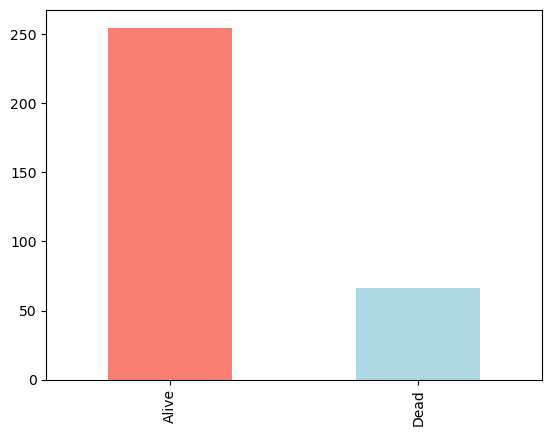

In [6]:
# Plot the value counts with a bar graph
df.Patient_Status.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [8]:
# Missing value count in each column
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

The null values present are on date of last visit and patient status. As the patient status are not available and cannot be filled randomly, we will drop all null values.

In [9]:
# Creating a copy of dataframe before dropping null values
original_df = df

df = df.dropna()

In [10]:
# Checking Missing value count
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [11]:
df.drop(columns = [ "Date_of_Surgery","Date_of_Last_Visit"], inplace = True)
df #to drop the features that are not needed.

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      317 non-null    object 
 1   Age             317 non-null    float64
 2   Gender          317 non-null    object 
 3   Protein1        317 non-null    float64
 4   Protein2        317 non-null    float64
 5   Protein3        317 non-null    float64
 6   Protein4        317 non-null    float64
 7   Tumour_Stage    317 non-null    object 
 8   Histology       317 non-null    object 
 9   ER status       317 non-null    object 
 10  PR status       317 non-null    object 
 11  HER2 status     317 non-null    object 
 12  Surgery_type    317 non-null    object 
 13  Patient_Status  317 non-null    object 
dtypes: float64(5), object(9)
memory usage: 37.1+ KB


Another way to get some quick insights on your dataframe is to use df.describe(). describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [13]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


### Breast Cancer Frequency according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column. 

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [14]:
df.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

There are 313 females and 4 males in our study.

In [15]:
# Compare patient status column with gender column
pd.crosstab(df.Patient_Status, df.Gender)

Gender,FEMALE,MALE
Patient_Status,,
Alive,252,3
Dead,61,1


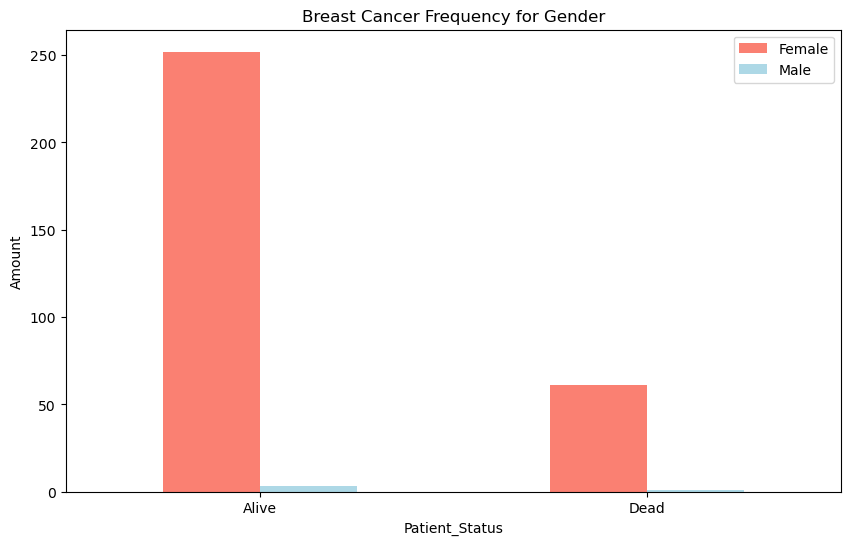

In [16]:
# Create a plot
pd.crosstab(df.Patient_Status, df.Gender).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Breast Cancer Frequency for Gender")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,317.0,58.725552,12.827374,29.00000,49.00000,58.000000,67.00000,90.0000
Protein1,317.0,-0.027232,0.543858,-2.14460,-0.35060,0.005649,0.33626,1.5936
Protein2,317.0,0.949557,0.906153,-0.97873,0.36884,0.997130,1.61200,3.4022
Protein3,317.0,-0.095104,0.589027,-1.62740,-0.53136,-0.193040,0.25121,2.1934
Protein4,317.0,0.006713,0.625965,-2.02550,-0.38224,0.038522,0.43625,1.6299


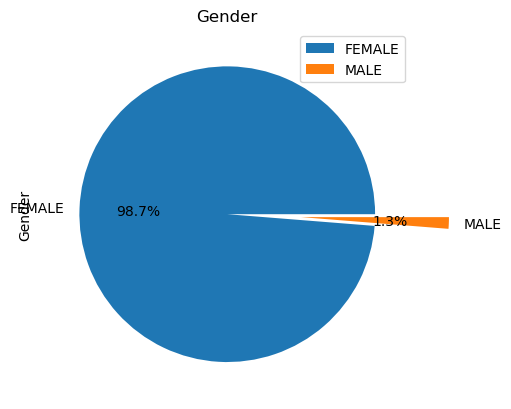

In [18]:
df.Gender.value_counts().plot(kind='pie',title='Gender',legend=True,autopct='%1.1f%%', explode=[0,0.5])
plt.show()

In [19]:
df["Tumour_Stage"].describe()

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

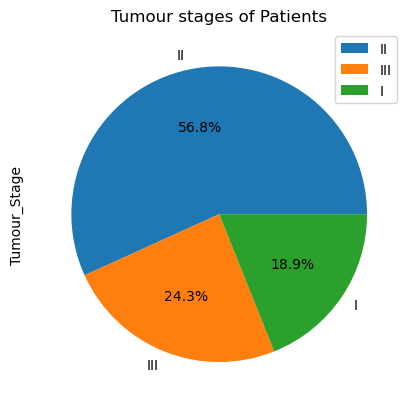

In [20]:
df['Tumour_Stage'].value_counts().plot(kind='pie',title='Tumour stages of Patients',legend=True,autopct='%1.1f%%')
plt.show()

In [21]:
df["Histology"].describe()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

In [22]:
df['Histology'].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

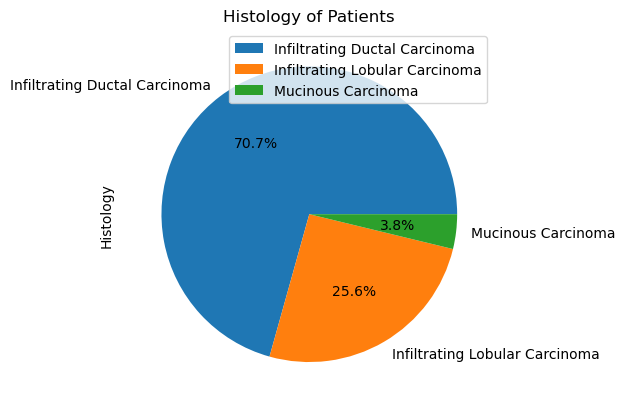

In [23]:
df['Histology'].value_counts().plot(kind='pie',title='Histology of Patients',legend=True,autopct='%1.1f%%');

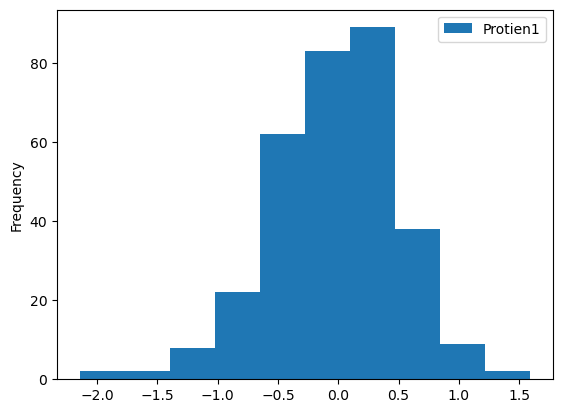

In [24]:
# Histograms are a great way to check the distribution of a variable
df.Protein1.plot.hist(legend=True,label="Protien1");

In [25]:
table = pd.crosstab(df['Tumour_Stage'],df['Gender'])
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


<AxesSubplot:xlabel='Tumour_Stage'>

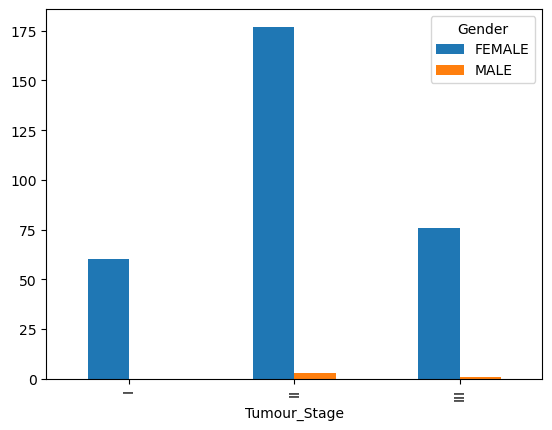

In [26]:
table.plot(kind='bar')

In [27]:
table = pd.crosstab(df['Surgery_type'], df['Gender'])
table

Gender,FEMALE,MALE
Surgery_type,,
Lumpectomy,66,0
Modified Radical Mastectomy,87,2
Other,96,1
Simple Mastectomy,64,1


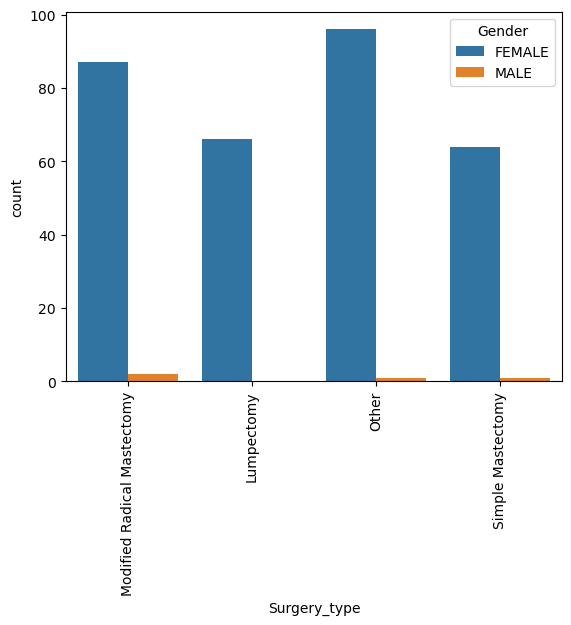

In [28]:
sns.countplot(x="Surgery_type", data=df, hue="Gender")
plt.xticks(rotation =90)
plt.show()

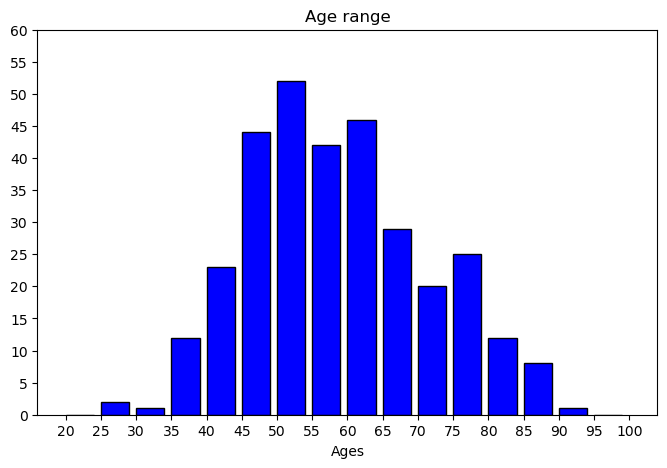

In [29]:
x = list(range(20,105,5))
plt.figure(figsize=(8,5))
plt.hist(df['Age'].astype(int),width=4, align='mid', bins = x, color='blue', edgecolor = 'black')
plt.xticks(x)
plt.xlabel('Ages')
plt.title('Age range')
plt.yticks(np.arange(0,65,5))
plt.show()

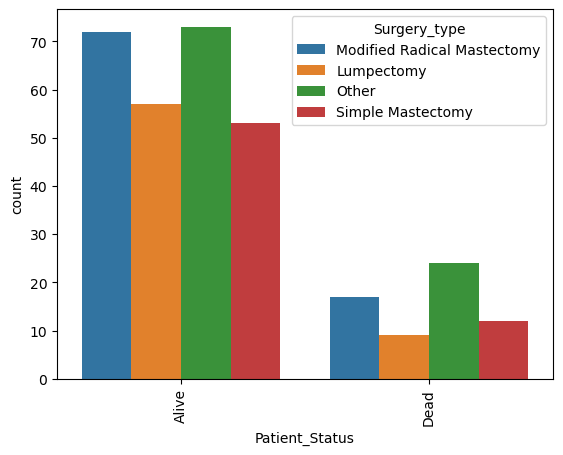

In [30]:
sns.countplot(x="Patient_Status", data=df, hue="Surgery_type")
plt.xticks(rotation =90)
plt.show()

In [31]:
df['Tumour_Stage'] = df['Tumour_Stage'].map({'I':1,'II':2,'III':3})
df['Histology'] = df['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,})
df['ER status'] = df['ER status'].map({'Positive':1})
df['PR status'] = df['PR status'].map({'Positive':1})
df['HER2 status'] = df['HER2 status'].map({'Positive':1,'Negative':2})
df['Gender'] = df['Gender'].map({'MALE':1,'FEMALE':2})
df['Surgery_type'] = df['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4})
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,2,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,Alive
1,TCGA-EW-A1OX,43.0,2,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,Dead
2,TCGA-A8-A079,69.0,2,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,Alive
3,TCGA-D8-A1XR,56.0,2,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,Alive
4,TCGA-BH-A0BF,56.0,2,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,Dead


## Modeling

In [32]:
# Independent variable
x = df[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]

# Dependented Variable
y = df["Patient_Status"]

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [33]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(x, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [34]:
X_train.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
218,85.0,2,0.40553,0.33144,-0.25743,-0.654760,2,1,1,1,2,1
78,56.0,2,-0.25750,0.80691,-0.50917,-0.034585,1,1,1,1,2,1
96,57.0,2,-0.21378,-0.62814,1.02260,0.202440,2,1,1,1,1,3
232,54.0,2,0.43464,2.45220,0.33389,0.629010,2,1,1,1,2,1
326,46.0,2,-0.74014,-0.73755,0.72032,0.721820,2,1,1,1,2,4


In [35]:
y_test

75     Alive
295    Alive
27     Alive
267    Alive
10     Alive
       ...  
230    Alive
217    Alive
113    Alive
95     Alive
128     Dead
Name: Patient_Status, Length: 64, dtype: object

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [80]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [81]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.78125, 'Logistic Regression': 0.828125, 'Random Forest': 0.828125}

Beautiful! Since our models are fitting, let's compare them visually.

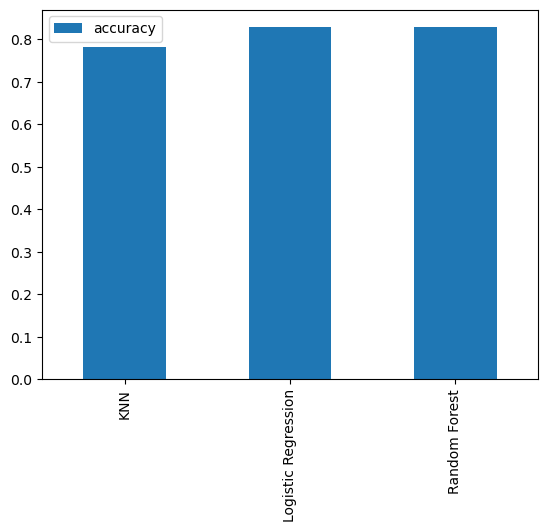

In [38]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **ROC** at the same time.

Here's the game plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get classification report

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [39]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 13) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8300395256916996,
 0.857707509881423,
 0.8102766798418972,
 0.7984189723320159,
 0.8063241106719368,
 0.7944664031620553,
 0.7944664031620553,
 0.7865612648221344,
 0.7944664031620553,
 0.7984189723320159,
 0.7944664031620553]

These are hard to understand, let's plot them.

Maximum KNN score on the test data: 82.81%


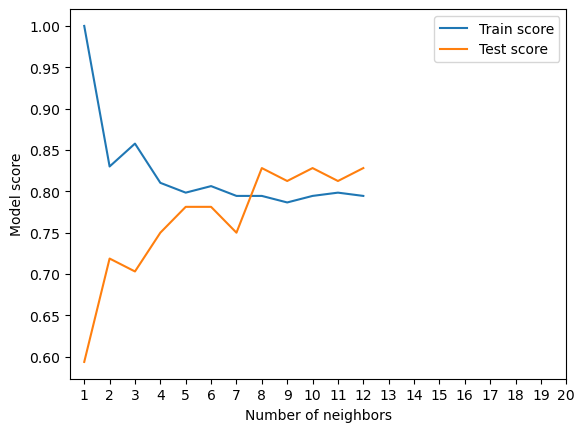

In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [42]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [45]:
rs_log_reg.score(X_test, y_test)

0.828125

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [46]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [48]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.828125

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [49]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [50]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [51]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.828125

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [52]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [53]:
# Let's see them.
y_preds

array(['Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive'], dtype=object)

In [54]:
y_test

75     Alive
295    Alive
27     Alive
267    Alive
10     Alive
       ...  
230    Alive
217    Alive
113    Alive
95     Alive
128     Dead
Name: Patient_Status, Length: 64, dtype: object

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`plot_roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) function we can see it takes `(estimator, X, y)` as inputs. Where `estiamator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

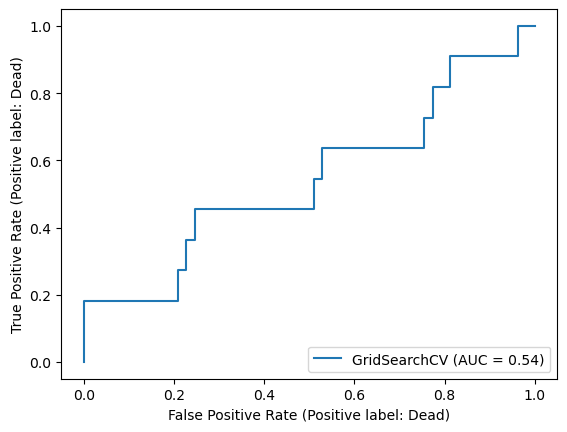

In [55]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [56]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[53  0]
 [11  0]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit bland. For a presentation you'd probably want to make it visual.

Let's create a function which uses Seaborn's [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for doing so.

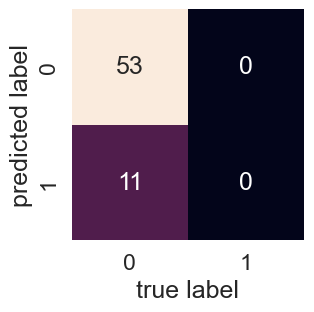

In [57]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Beautiful! That looks much better. 

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 11 occasions where the model predicted 1 instead of 0 (false positive).

### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [58]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



What's going on here?

Let's get a refresh.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [59]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [60]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [61]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.796875  , 0.796875  , 0.80952381, 0.80952381, 0.80952381])

Since there are 5 metrics here, we'll take the average.

In [62]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8044642857142856

Now we can update our old models with their optimized versions. After this point we can not optimized our models as we have limited no. of samples (317). If we want to reach 90

In [79]:
# Now we can update our old models with their optimized versions
models["Logistic Regression"] = rs_log_reg
models["Random Forest"] = rs_rf

In [64]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'KNN': 0.828125, 'Logistic Regression': 0.828125, 'Random Forest': 0.828125}

Now we can update our old models with their optimized versions. After this point we can not optimize our models as we have limited no. of samples (317). If we want to reach 85% above, we need more data

In [86]:
def make_prediction(features):
    return models["Random Forest"].predict(features)

## Custom Prediction

In [90]:
featuress = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
make_prediction(featuress)

array(['Alive'], dtype=object)

In [91]:
features = np.array([[43.0, 1, -0.42032, 0.57807, 0.61447, -0.031505, 3, 1, 1, 1, 2, 3,]])
make_prediction(features)

array(['Dead'], dtype=object)

## Save and load model

In [92]:
import pickle

for name, model in models.items():
    model_name = name.replace(" ", "_") + ".pkl"
    pickle.dump(model, open(model_name, "wb"))

In [93]:
random_forest_model = pickle.load(open("Random_Forest.pkl", "rb"))
random_forest_model.score(X_test, y_test)

0.828125

<img src = "https://media2.giphy.com/media/L7f9JnbS9dBHJ4NQT3/giphy.gif?cid=ecf05e47sufpsk8sjssqx8y2hff96ewce6fnyaau0q165epp&rid=giphy.gif&ct=g">